## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2023-24 учебный год

## О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn, а также познакомитесь с plotly.

EDA - важный этап работы с данными. Именно в процессе EDA вы можете выяснить особенности датасета, найти зависимости в данных, протестировать гипотезы о взаимосвязях признаков и целевой переменной. В реальности вы сами будете определять, что и как проверять в рамках EDA, однако в данной работе гипотезы будут выдвинуты за вас автором задания. Также и типы графиков, которые вы будете использовать уже предопределены за вас. Выполняя задания по визуализациям, обращайте внимание на референсные картинки, которые были оставлены автором. Они показывают, какой примерно результат от вас ожидается.

Это задание будет включать в себя построение некоторого количества графиков, потому вот основные правила, в соответствии с которыми графики должны быть оформлены:
1. Любой график всегда имеет название.
2. Оси у графика подписаны (исключение - график делит название оси с соседним).
3. Подписи делаются на одном языке (либо английский, либо русский), но не на их смеси.
4. Если вы выводите несколько графиков, то они размещаются в рамках одного объекта matplotlib.pyplot.figure. Вы не выводите графики последовательно, а смотрите, как их разместить сразу все за раз.
5. Отдельные графики (если графиков на картинке больше 1) также имеют свои названия.
6. Если на графике есть несколько различных объектов, то для их различения используется легенда. Помещайте легенду в место, где она в наименьшей мере мешает восприятию самого графика.
7. Если есть легенда, то она должна иметь навание, а также ее содержание должно быть адекватными (пожалейте проверяющих, они не хотят разбирать, а к чему относится зеленая линия, которая на легенде помечена меткой "0").
8. Используйте цветовые гаммы, чтобы объекты на графиках отличались цветом.
9. Текст на визуализации должен быть читаем. Если вы вывели названия категорий в качестве подписей на оси Х, а эти названия наезжают друг на друга, то вам нужно что-то с этим сделать. Нечитаемый или плохо читаемый (очень маленький, невероятно огромный) текст ведет к снижению баллов.

*Тут правило про плагиат, которое вам итак известно - обнуляются все работы, которые подозреваются в некорректных заимствованиях!* Помните, что просто скопировать код из интернета и указать источник - это не ваша самостоятельная работа, а автора кода. Измените хоть что-нибудь в коде.

## О данных

Будем работать с [датасетом физической активности](https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones).

В этом датасете собраны данные 30 человек, выполняющих различные действия со смартфоном на поясе. Данные записывались с помощью датчиков (акселерометра и гироскопа) в этом смартфоне. Были зафиксированы: "3-осевое линейное ускорение" (_tAcc-XYZ_) и "3-осевая угловая скорость" (_tGyro-XYZ_).

1. Все сигналы отсортированы по времени, пропущены через фильтр шума.
2. Все наблюдения были разделены на окна по 128 сигналов в каждом, причем окна пересекаются на 50% (грубо говоря, с 1 по 128 сигнал в 1 окно, с 64 до 192 сигнала - во 2 окно и так далее).
3. Линейное ускорение было разделено на две составляющие (с помощью низкочастотного фильтра): ускорение самого тела, а также гравитационная составляющая. Будем называть их ускорением тела и гравитационным ускорением.
4. К получившимся окнам применяли различные функции для получения следующих показателей:
    - max
    - min
    - mad (median)
    - mean
    - std
    - skewness (коэффициент асимметричности распределения признака в окне)
    - etc. (подробнее, на сколько это возможно, указано на [страничке датасета](https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones))
5. Величина (magnitude) сигнала также определялась через евклидову норму всех значений из вектора для одного окна.
6. К окнам было применено преобразование Фурье, чтобы получить частоты. Из частот были извелченыте же показатели, плюс новые:
    - bandsEnergy (энергия частотного интервала)
7. Были посчитаны углы между векторами соответствующих окон.
8. Для ускорений были посчитаны производные - рывки, к которым применялись те же функции.

Итог: в датасете каждый признак - это какая-то операция над вектором из 128 чисел, которые соответствуют замерам определенного человека занятого какой-то активностью на протяжении 2.56 секунд.

Как читать названия признаков? Примеры:
- `tBodyAccMag-mean()` - это вектор ускорений тела (без гравитационной составляющей этого ускорения), из которого взяли евклидову норму, а затем усреднили, чтобы получить скаляр
- `fBodyAcc-bandsEnergy()-1,8.2` - это вектор ускорения тела, к которому применили преобразование Фурье, преобразовав его в вектор частот, а затем посчитали на этом векторе энергию данного частотного интервала в определенном диапазоне частот (в данном случае 1 - 8.2)
- `angle(X,gravityMean)` - это угол между осью Х и вектором усредненных значений гравитационного ускорения из соответствующего окна

Вероятно, сначала покажется сложным, но мы разберемся с некоторыми признаками в отдельности и вы сможете понять их смысл, уже исходя из фактических соотношений.

## Предобработка данных

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!pip install kaggle


In [6]:
!mkdir ~/.kaggle
!cp "/content/drive/MyDrive/kaggle.json" ~/.kaggle
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d 'uciml/human-activity-recognition-with-smartphones' -p /content/

 49% 12.0M/24.5M [00:00<00:00, 126MB/s]
100% 24.5M/24.5M [00:00<00:00, 151MB/s]


In [7]:
!unzip *.zip

Archive:  human-activity-recognition-with-smartphones.zip
  inflating: test.csv                
  inflating: train.csv               


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [9]:
train = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")

In [10]:
train.shape

(7352, 563)

В датасете 563 признака, включая целевую переменную. Столько признаков нам не нужно. Мы за вас сделали подвыборку признаков для удобства работы с ними.

In [11]:
cols_subset = [
    'tBodyAccMag-mean()',  # усредненная величина ускорения тела
    'tBodyGyroJerk-mad()-X',  # медианная величина рывка тела по оси Х
    'tGravityAcc-min()-X',  # минимум гравитационной составляющей ускорения по оси Х
    'tBodyAcc-max()-X',  # максимальная величина ускорения тела по оси Х
    'fBodyAcc-bandsEnergy()-1,8.2',  # энергия ускорения тела в интервале частоты
    'angle(X,gravityMean)',  # угол между осью Х и усредненной гравитационной составляющей ускорения
    'angle(Y,gravityMean)',  # угол между осью Y и усредненной гравитационной составляющей ускорения
    'angle(Z,gravityMean)',  # угол между осью Z и усредненной гравитационной составляющей ускорения,
    'fBodyAcc-skewness()-X',  # асимметричность частоты ускорения тела по оси Х
    'subject',  # номер испытуемого
    'Activity',  # название вида деятельности (целевая переменная)
]

In [12]:
train = train[cols_subset]
test = test[cols_subset]

### Задание 1 (0.5 балла)

Посмотрите на пропуски и дубли в данных train и test. Есть ли они? Если есть, напишите, с чем это может быть связано? Если нет, то просто напишите, что пропусков и/или дублей нет.

In [13]:
# Проверка наличия пропусков в данных train
print("Пропуски в данных train:")
print(train.isnull().sum())

# Проверка наличия дубликатов в данных train
print("\nДубликаты в данных train:", train.duplicated().sum())

# Проверка наличия пропусков в данных test
print("\nПропуски в данных test:")
print(test.isnull().sum())

# Проверка наличия дубликатов в данных test
print("\nДубликаты в данных test:", test.duplicated().sum())


Пропуски в данных train:
tBodyAccMag-mean()              0
tBodyGyroJerk-mad()-X           0
tGravityAcc-min()-X             0
tBodyAcc-max()-X                0
fBodyAcc-bandsEnergy()-1,8.2    0
angle(X,gravityMean)            0
angle(Y,gravityMean)            0
angle(Z,gravityMean)            0
fBodyAcc-skewness()-X           0
subject                         0
Activity                        0
dtype: int64

Дубликаты в данных train: 0

Пропуски в данных test:
tBodyAccMag-mean()              0
tBodyGyroJerk-mad()-X           0
tGravityAcc-min()-X             0
tBodyAcc-max()-X                0
fBodyAcc-bandsEnergy()-1,8.2    0
angle(X,gravityMean)            0
angle(Y,gravityMean)            0
angle(Z,gravityMean)            0
fBodyAcc-skewness()-X           0
subject                         0
Activity                        0
dtype: int64

Дубликаты в данных test: 0


### Задание 2 (0.5 балла)

Выведите основные статистики данных: среднее, медиана, перцентили (0.25, 0.5, 0.75), минимум, максимум, стандартное отклонение. Посмотрите на таблицу и напишите, видите ли вы в ней что-нибудь интересное.

In [14]:
stats_train = train.describe().loc[['mean', 'std', '25%','50%', '75%', 'min', 'max']]
median = train.median()
stats_train.append(median.rename('median'))

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  \
mean             -0.543884              -0.727735             0.678505   
std               0.477653               0.315832             0.508656   
25%              -0.983282              -0.991595             0.804270   
50%              -0.883371              -0.950268             0.926693   
75%              -0.106892              -0.474625             0.965095   
min              -1.000000              -0.999889            -1.000000   
max               1.000000               1.000000             1.000000   
median           -0.883371              -0.950268             0.926693   

        tBodyAcc-max()-X  fBodyAcc-bandsEnergy()-1,8.2  angle(X,gravityMean)  \
mean           -0.468604                     -0.847963             -0.489547   
std             0.544547                      0.233633              0.511807   
25%            -0.936219                     -0.999480             -0.812065   
50%            -0.881637                     -0.986582             -0.709417   
75%            -0.017129                     -0.764508             -0.509079   
min            -1.000000                     -1.000000             -1.000000   
max             1.000000                      1.000000              1.000000   
median         -0.881637                     -0.986582             -0.709417   

        angle(Y,gravityMean)  angle(Z,gravityMean)  fBodyAcc-skewness()-X  \
mean                0.058593             -0.056515              -0.128562   
std                 0.297480              0.279122               0.403686   
25%                -0.017885             -0.143414              -0.486841   
50%                 0.182071              0.003181              -0.163271   
75%                 0.248353              0.107659               0.155112   
min                -1.000000             -1.000000              -0.931208   
max                 0.478157              1.000000               1.000000   
median              0.182071              0.003181              -0.163271   

          subject  
mean    17.413085  
std      8.975143  
25%      8.000000  
50%     19.000000  
75%     26.000000  
min      1.000000  
max     30.000000  
median  19.000000

- Для признаков tGravityAcc-min()-X и fBodyAcc-bandsEnergy()-1,8.2 средние значения и медианы близки к -1, что может указывать на то, что в среднем эти показатели имеют отрицательную тенденцию
- Для признака subject максимальное значение равно 30, что указывает на то, что данные собраны от 30 различных испытуемых.
- Медиана и 50-й процентиль совпадают для всех признаков, что говорит о том, что данные распределены приблизительно равномерно.

In [15]:
stats_test = test.describe().loc[['mean', 'std', '25%','50%', '75%', 'min', 'max']]
median_test = test.median()
stats_train.append(median_test.rename('median'))

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  \
mean             -0.543884              -0.727735             0.678505   
std               0.477653               0.315832             0.508656   
25%              -0.983282              -0.991595             0.804270   
50%              -0.883371              -0.950268             0.926693   
75%              -0.106892              -0.474625             0.965095   
min              -1.000000              -0.999889            -1.000000   
max               1.000000               1.000000             1.000000   
median           -0.861830              -0.914698             0.934930   

        tBodyAcc-max()-X  fBodyAcc-bandsEnergy()-1,8.2  angle(X,gravityMean)  \
mean           -0.468604                     -0.847963             -0.489547   
std             0.544547                      0.233633              0.511807   
25%            -0.936219                     -0.999480             -0.812065   
50%            -0.881637                     -0.986582             -0.709417   
75%            -0.017129                     -0.764508             -0.509079   
min            -1.000000                     -1.000000             -1.000000   
max             1.000000                      1.000000              1.000000   
median         -0.852659                     -0.979336             -0.729648   

        angle(Y,gravityMean)  angle(Z,gravityMean)  fBodyAcc-skewness()-X  \
mean                0.058593             -0.056515              -0.128562   
std                 0.297480              0.279122               0.403686   
25%                -0.017885             -0.143414              -0.486841   
50%                 0.182071              0.003181              -0.163271   
75%                 0.248353              0.107659               0.155112   
min                -1.000000             -1.000000              -0.931208   
max                 0.478157              1.000000               1.000000   
median              0.181563             -0.010671              -0.202050   

          subject  
mean    17.413085  
std      8.975143  
25%      8.000000  
50%     19.000000  
75%     26.000000  
min      1.000000  
max     30.000000  
median  12.000000

- Для признака tGravityAcc-min()-X 75% данных лежат выше значения 0.965, что говорит о том, что большинство значений минимальной гравитационной составляющей ускорения по оси X находятся близко к 1.
- Для признака tBodyAcc-max()-X 25% данных лежат ниже значения -0.936, а максимальное значение равно 1. Это означает, что есть некоторые выбросы в данных, но большинство значений ускорения тела по оси X близки к -1.

### Задание 3 (0.5 балла)

Данные сбалансированы? У вас есть 6 категорий активности (целевая переменная). Если одна из категорий представлена большим количеством наблюдений, а остальные - нет, то это обстоятельство, о котором хотелось бы знать заранее. Гиперболизированный пример: представьте, что у вас 1000 наблюдений, разделенных на два класса, и только 5 принадлежат ко второму классу. Как учить модель на такой выборке? Есть сильное подозрение, что многие модели будут склонны вырождаться в константу. Отсюда и необходимость проверять баланс классов.

Выведите количество наблюдений для всех категорий активности в train и test. Посчитайте разницу в процентах между самой крупной категорией и самой маленькой (самая большая категория - это 100%). Если разница (округленная до ближайшего целого числа) не превышает 30%, то давайте для наших целей считать, что данные сбалансированы. Напишите, сбалансированы ли данные в train и test.

In [16]:
# Подсчет количества наблюдений для каждой категории активности в train
train_activity_counts = train['Activity'].value_counts()

# Подсчет количества наблюдений для каждой категории активности в test
test_activity_counts = test['Activity'].value_counts()

# Нахождение самой крупной и самой маленькой категорий активности
max_train_activity = train_activity_counts.max()
min_train_activity = train_activity_counts.min()

max_test_activity = test_activity_counts.max()
min_test_activity = test_activity_counts.min()

# Расчет разницы в процентах между самой крупной и самой маленькой категориями активности
diff_train_percent = ((max_train_activity - min_train_activity) / max_train_activity) * 100
diff_test_percent = ((max_test_activity - min_test_activity) / max_test_activity) * 100

# Определение, сбалансированы ли данные в train и test
balanced_train = "сбалансированы" if diff_train_percent <= 30 else "не сбалансированы"
balanced_test = "сбалансированы" if diff_test_percent <= 30 else "не сбалансированы"

diff_train_percent, diff_test_percent, balanced_train, balanced_test


(29.92181947405828, 21.787709497206702, 'сбалансированы', 'сбалансированы')

### Задание 4 (0.5 балла)

Посчитайте корреляции всех признаков (включая таргет) со всеми другими. Какими получились значения? Есть идеи, почему так? Напишите ваши мысли.

In [17]:
pd.get_dummies(train, columns=['Activity']).corr()

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  \
tBodyAccMag-mean()                      1.000000               0.899080   
tBodyGyroJerk-mad()-X                   0.899080               1.000000   
tGravityAcc-min()-X                     0.369962               0.380118   
tBodyAcc-max()-X                        0.959827               0.879900   
fBodyAcc-bandsEnergy()-1,8.2            0.697832               0.507939   
angle(X,gravityMean)                   -0.370849              -0.382246   
angle(Y,gravityMean)                    0.495561               0.478567   
angle(Z,gravityMean)                    0.426283               0.380967   
fBodyAcc-skewness()-X                   0.379796               0.266002   
subject                                -0.073652              -0.110321   
Activity_LAYING                        -0.396643              -0.386730   
Activity_SITTING                       -0.396389              -0.379403   
Activity_STANDING                      -0.414460              -0.370699   
Activity_WALKING                        0.358825               0.531695   
Activity_WALKING_DOWNSTAIRS             0.561344               0.445048   
Activity_WALKING_UPSTAIRS               0.405434               0.257524   

                              tGravityAcc-min()-X  tBodyAcc-max()-X  \
tBodyAccMag-mean()                       0.369962          0.959827   
tBodyGyroJerk-mad()-X                    0.380118          0.879900   
tGravityAcc-min()-X                      1.000000          0.380404   
tBodyAcc-max()-X                         0.380404          1.000000   
fBodyAcc-bandsEnergy()-1,8.2             0.239088          0.613383   
angle(X,gravityMean)                    -0.988663         -0.384192   
angle(Y,gravityMean)                     0.797116          0.480229   
angle(Z,gravityMean)                     0.667415          0.405023   
fBodyAcc-skewness()-X                   -0.261676          0.335708   
subject                                 -0.042371         -0.055633   
Activity_LAYING                         -0.973167         -0.394745   
Activity_SITTING                         0.187055         -0.387297   
Activity_STANDING                        0.262354         -0.399861   
Activity_WALKING                         0.234820          0.298526   
Activity_WALKING_DOWNSTAIRS              0.192409          0.658369   
Activity_WALKING_UPSTAIRS                0.159741          0.347429   

                              fBodyAcc-bandsEnergy()-1,8.2  \
tBodyAccMag-mean()                                0.697832   
tBodyGyroJerk-mad()-X                             0.507939   
tGravityAcc-min()-X                               0.239088   
tBodyAcc-max()-X                                  0.613383   
fBodyAcc-bandsEnergy()-1,8.2                      1.000000   
angle(X,gravityMean)                             -0.213318   
angle(Y,gravityMean)                              0.363170   
angle(Z,gravityMean)                              0.423927   
fBodyAcc-skewness()-X                             0.260316   
subject                                          -0.037000   
Activity_LAYING                                  -0.287395   
Activity_SITTING                                 -0.276766   
Activity_STANDING                                -0.296141   
Activity_WALKING                                  0.189834   
Activity_WALKING_DOWNSTAIRS                       0.217399   
Activity_WALKING_UPSTAIRS                         0.534750   

                              angle(X,gravityMean)  angle(Y,gravityMean)  \
tBodyAccMag-mean()                       -0.370849              0.495561   
tBodyGyroJerk-mad()-X                    -0.382246              0.478567   
tGravityAcc-min()-X                      -0.988663              0.797116   
tBodyAcc-max()-X                         -0.384192              0.480229   
fBodyAcc-bandsEnergy()-1,8.2             -0.213318              0.363170   
angle(X,gravityMean)               

In [18]:
pd.get_dummies(test, columns=['Activity']).corr()

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  \
tBodyAccMag-mean()                      1.000000               0.934773   
tBodyGyroJerk-mad()-X                   0.934773               1.000000   
tGravityAcc-min()-X                     0.407084               0.393773   
tBodyAcc-max()-X                        0.965114               0.898628   
fBodyAcc-bandsEnergy()-1,8.2            0.767875               0.625414   
angle(X,gravityMean)                   -0.400871              -0.387274   
angle(Y,gravityMean)                    0.439051               0.423288   
angle(Z,gravityMean)                    0.425011               0.368411   
fBodyAcc-skewness()-X                   0.365670               0.278765   
subject                                -0.057359              -0.079811   
Activity_LAYING                        -0.432375              -0.409460   
Activity_SITTING                       -0.401367              -0.395664   
Activity_STANDING                      -0.414812              -0.379256   
Activity_WALKING                        0.382256               0.522026   
Activity_WALKING_DOWNSTAIRS             0.533885               0.464393   
Activity_WALKING_UPSTAIRS               0.399410               0.255742   

                              tGravityAcc-min()-X  tBodyAcc-max()-X  \
tBodyAccMag-mean()                       0.407084          0.965114   
tBodyGyroJerk-mad()-X                    0.393773          0.898628   
tGravityAcc-min()-X                      1.000000          0.386764   
tBodyAcc-max()-X                         0.386764          1.000000   
fBodyAcc-bandsEnergy()-1,8.2             0.301643          0.707129   
angle(X,gravityMean)                    -0.989043         -0.384454   
angle(Y,gravityMean)                     0.697006          0.410477   
angle(Z,gravityMean)                     0.633881          0.398008   
fBodyAcc-skewness()-X                   -0.237864          0.338543   
subject                                  0.004927         -0.071786   
Activity_LAYING                         -0.983505         -0.407889   
Activity_SITTING                         0.196159         -0.396788   
Activity_STANDING                        0.244371         -0.408003   
Activity_WALKING                         0.227835          0.281951   
Activity_WALKING_DOWNSTAIRS              0.193024          0.638335   
Activity_WALKING_UPSTAIRS                0.163337          0.364582   

                              fBodyAcc-bandsEnergy()-1,8.2  \
tBodyAccMag-mean()                                0.767875   
tBodyGyroJerk-mad()-X                             0.625414   
tGravityAcc-min()-X                               0.301643   
tBodyAcc-max()-X                                  0.707129   
fBodyAcc-bandsEnergy()-1,8.2                      1.000000   
angle(X,gravityMean)                             -0.279783   
angle(Y,gravityMean)                              0.327473   
angle(Z,gravityMean)                              0.446245   
fBodyAcc-skewness()-X                             0.293881   
subject                                          -0.090817   
Activity_LAYING                                  -0.342430   
Activity_SITTING                                 -0.295023   
Activity_STANDING                                -0.323854   
Activity_WALKING                                  0.213190   
Activity_WALKING_DOWNSTAIRS                       0.270809   
Activity_WALKING_UPSTAIRS                         0.524637   

                              angle(X,gravityMean)  angle(Y,gravityMean)  \
tBodyAccMag-mean()                       -0.400871              0.439051   
tBodyGyroJerk-mad()-X                    -0.387274              0.423288   
tGravityAcc-min()-X                      -0.989043              0.697006   
tBodyAcc-max()-X                         -0.384454              0.410477   
fBodyAcc-bandsEnergy()-1,8.2             -0.279783              0.327473   
angle(X,gravityMean)               

Признаки, связанные с активностью (Activity_LAYING, Activity_SITTING, Activity_STANDING, Activity_WALKING, Activity_WALKING_DOWNSTAIRS, Activity_WALKING_UPSTAIRS), имеют высокую отрицательную корреляцию со значениями angle(X,gravityMean) и tGravityAcc-min()-X, что логично, так как эти параметры должны меняться в зависимости от того, как человек смотрит, сидит или двигается
Признаки tBodyAccMag-mean() и tBodyAcc-max()-X имеют высокую положительную корреляцию (0.959), что ожидаемо, так как среднее и максимальное значения ускорения тела по оси X должны быть взаимосвязаны

Поздравляем! Вы предобработали данные для максимально комфортного их последующего анализа. Теперь вы готовы приступить к Exploratory Data Analysis!

## Exploratory Data Analysis

### Задание 5 (0.5 балла)

Вы проверили основную информацию о данных и составили свое первое впечатление о них. Теперь визуализации.

Начнем рисовать графики с небольшой разминки. Выберите две любые математические функции (отличные от линейной) и нарисуйте их на одном графике. Подпишите каждый из графиков, чтобы было понятно, какие функции вы выбрали. Ниже будет пример.

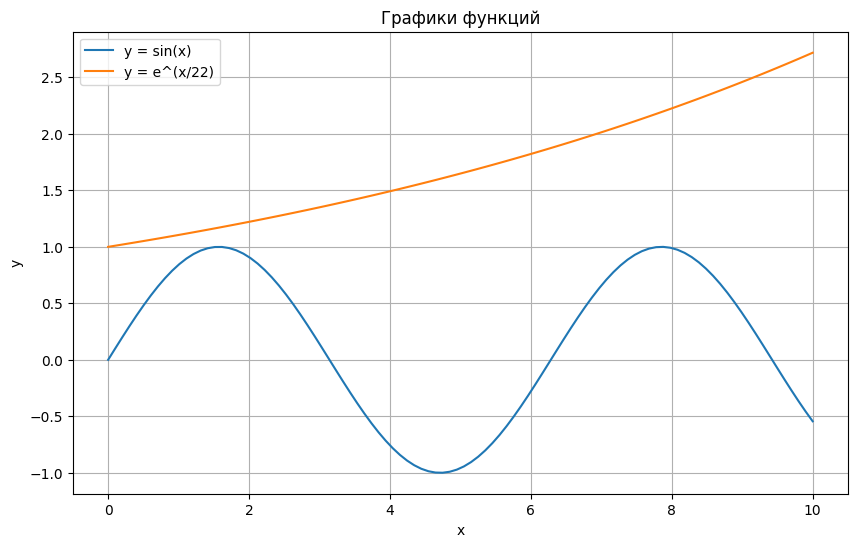

In [19]:
x = np.linspace(0, 10, 100)
y1 = np.sin(x)  # первая функция - синус
y2 = np.exp(x / 10)  # вторая функция - экспонента

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(x, y1, label='y = sin(x)')
plt.plot(x, y2, label='y = e^(x/22)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Графики функций')
plt.legend()
plt.grid(True)
plt.show()

### Задание 6 (0.5 балла)

Ранее мы уже проверили сбалансированность данных по разным категориям активностей в train и test сетах. Теперь визуализируйте количество сэмплов в каждой из категорий отдельно для train и test сетов, как в примере ниже. Проследите, чтобы порядок категорий слева и справа был одинаков. Иначе не очень удобно их сравнивать (когда они в разных местах двух графиков). Также заметьте, что в примере ось Х в одинаковом масштабе, что тоже удобно для сравнения.

Вам может пригодиться:
- plt.barh или ax.barh

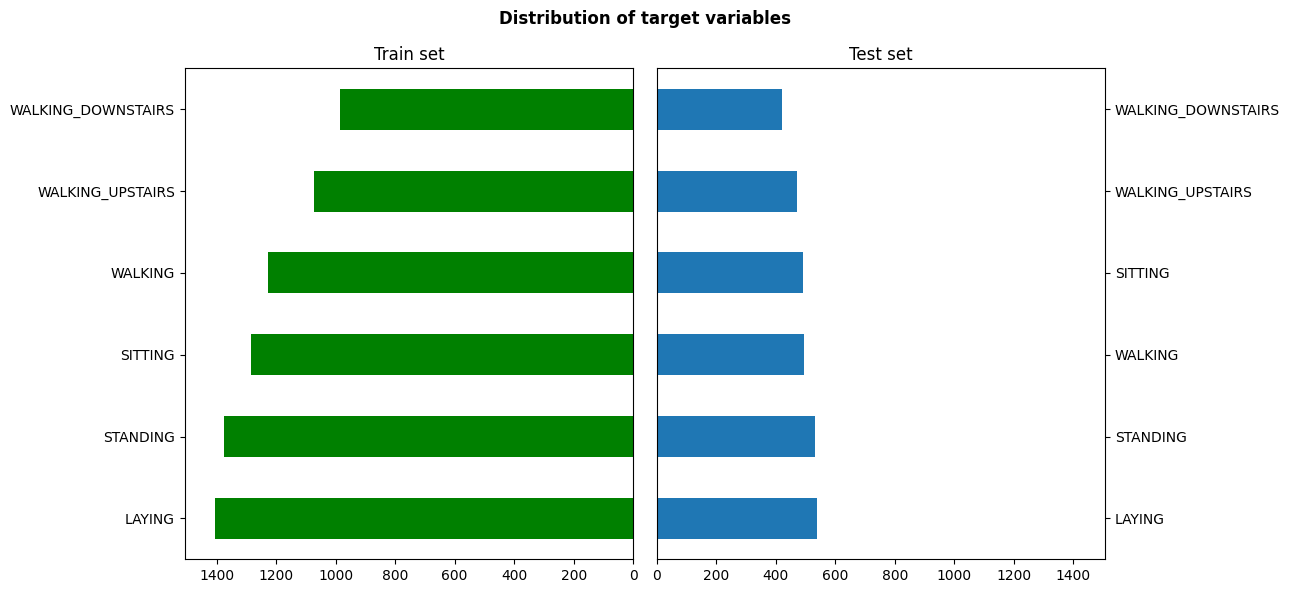

In [25]:
# Создаем переменные для максимального значения счетчиков активностей в test и train сетах
xmax = max(test_activity_counts.max(), train_activity_counts.max()) + 100

# Создаем фигуру с двумя графиками, один ряд, две колонки
plt.figure(figsize=(13, 6))
plt.suptitle("Distribution of target variables", weight='bold')

# График для train set
plt.subplot(1, 2, 1)
plt.title('Train set')
train_activity_counts.plot(kind='barh', color='green')
plt.ylabel('')
plt.xlim(0, xmax)
plt.gca().invert_xaxis()

# График для test set
plt.subplot(1, 2, 2)
plt.title('Test set')
plt.xlim(0, xmax)
test_activity_counts.plot(kind='barh')
plt.ylabel('')
plt.tick_params(labelright=True, labelleft=False, left=False, right=True)

# Отображаем графики на экране
plt.tight_layout()
plt.show()


Правда на таких графиках проще проверять баланс классов таргета?)

### Задание 7 (0.5 балла)

Ранее вы выводили таблицу корреляций. Однако просто таблица корреляций не очень удобна для анализа. Что, если признаков было бы больше? Визуализируйте heatmap корреляций. Подпишите значения корреляций, округленные до 2 знаков после запятой, на графике и оставьте только те значения, которые по модулю не меньше 0.5. Будем считать такие корреляции существенными. Если будете брать код из семинарского ноутбука, то поменяйте в нем что-нибудь, например, цветовую гамму, иначе проверяющий будет карать :)

Какой признак стоит исключить из рассмотрения корреляций? Напишите его название, а также причину, почему нет смысла его рассматривать.

Вам может пригодиться:
- sns.heatmap
- методы get_text и set_text у атрибута texts графика

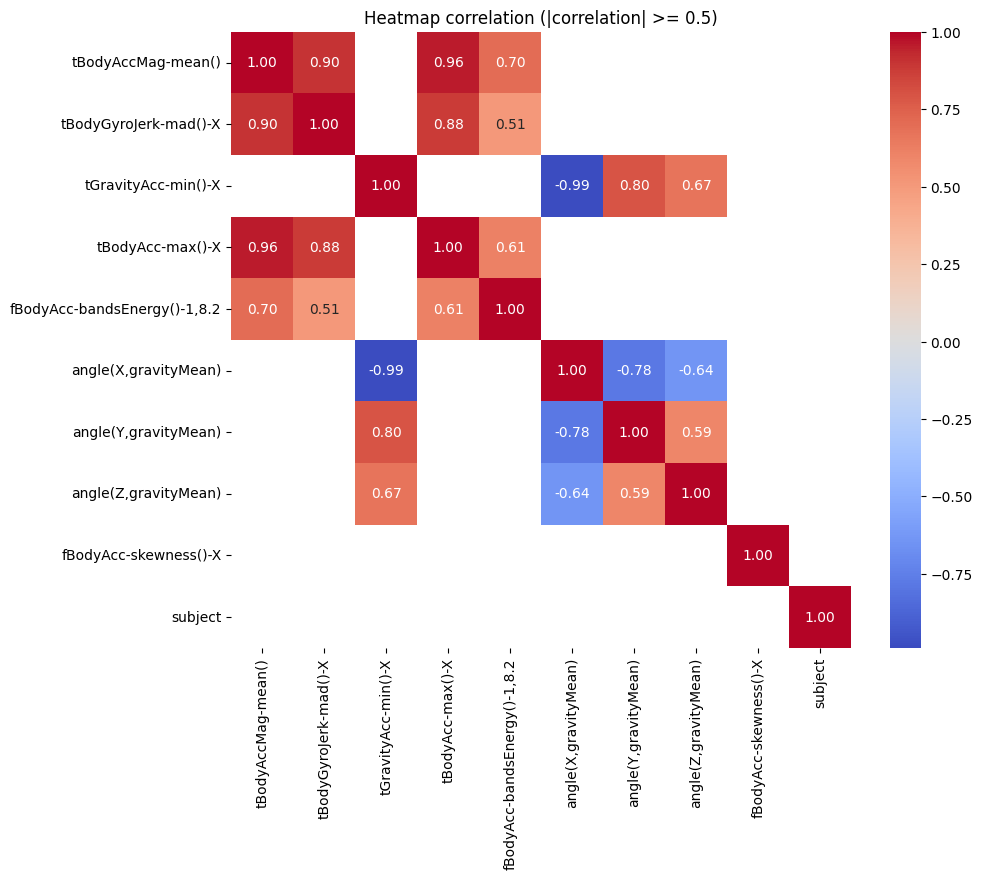

Признак для исключения из рассмотрения корреляций: subject
Причина исключения: Признак 'subject' не имеет смысла в контексте корреляционного анализа, поскольку он представляет идентификационный номер испытуемого и не имеет прямой связи с другими признаками.


In [21]:
# Вычисление корреляций
correlation_matrix = train.corr()

# Фильтрация значений корреляций
significant_corr = correlation_matrix[(correlation_matrix >= 0.5) | (correlation_matrix <= -0.5)]

# Создание тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(significant_corr, annot=True, cmap='coolwarm', fmt=".2f")

# Исключение признака
feature_to_exclude = 'subject'

# Причина исключения
reason = "Признак 'subject' не имеет смысла в контексте корреляционного анализа, поскольку он представляет идентификационный номер испытуемого и не имеет прямой связи с другими признаками."

plt.title('Heatmap correlation (|correlation| >= 0.5)')
plt.show()

print("Признак для исключения из рассмотрения корреляций:", feature_to_exclude)
print("Причина исключения:", reason)

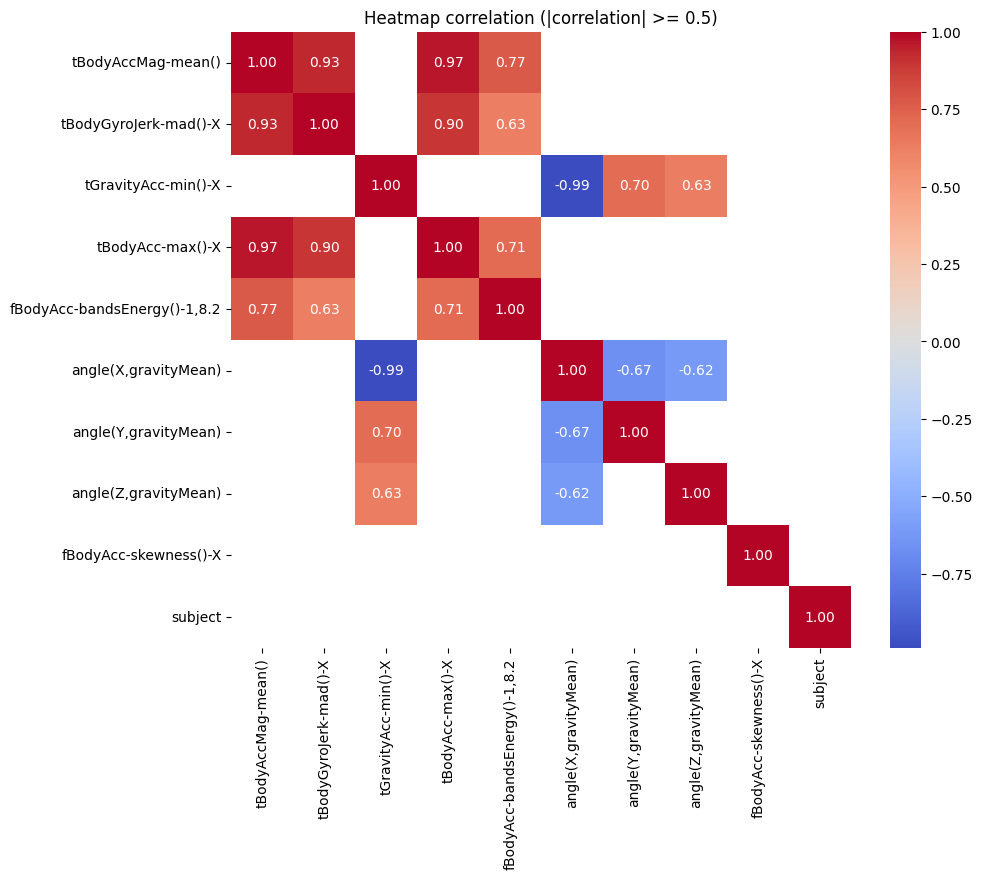

Признак для исключения из рассмотрения корреляций: subject
Причина исключения: Признак 'subject' не имеет смысла в контексте корреляционного анализа, поскольку он представляет идентификационный номер испытуемого и не имеет прямой связи с другими признаками.


In [22]:
# Вычисление корреляций
correlation_matrix = test.corr()

# Фильтрация значений корреляций
significant_corr = correlation_matrix[(correlation_matrix >= 0.5) | (correlation_matrix <= -0.5)]

# Создание тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(significant_corr, annot=True, cmap='coolwarm', fmt=".2f")

# Исключение признака
feature_to_exclude = 'subject'

# Причина исключения
reason = "Признак 'subject' не имеет смысла в контексте корреляционного анализа, поскольку он представляет идентификационный номер испытуемого и не имеет прямой связи с другими признаками."

plt.title('Heatmap correlation (|correlation| >= 0.5)')
plt.show()

print("Признак для исключения из рассмотрения корреляций:", feature_to_exclude)
print("Причина исключения:", reason)

### Задание 8 (0.5 балла)

Для начала будем стрелять из пушки по воробьям. Выведите pairplot по всем данным train сета. Напишите, заметили ли вы в нем что-нибудь интересное, чего не было в таблицах и графиках ранее, а также сообщите, было ли вам удобно анализировать 100 графиков.

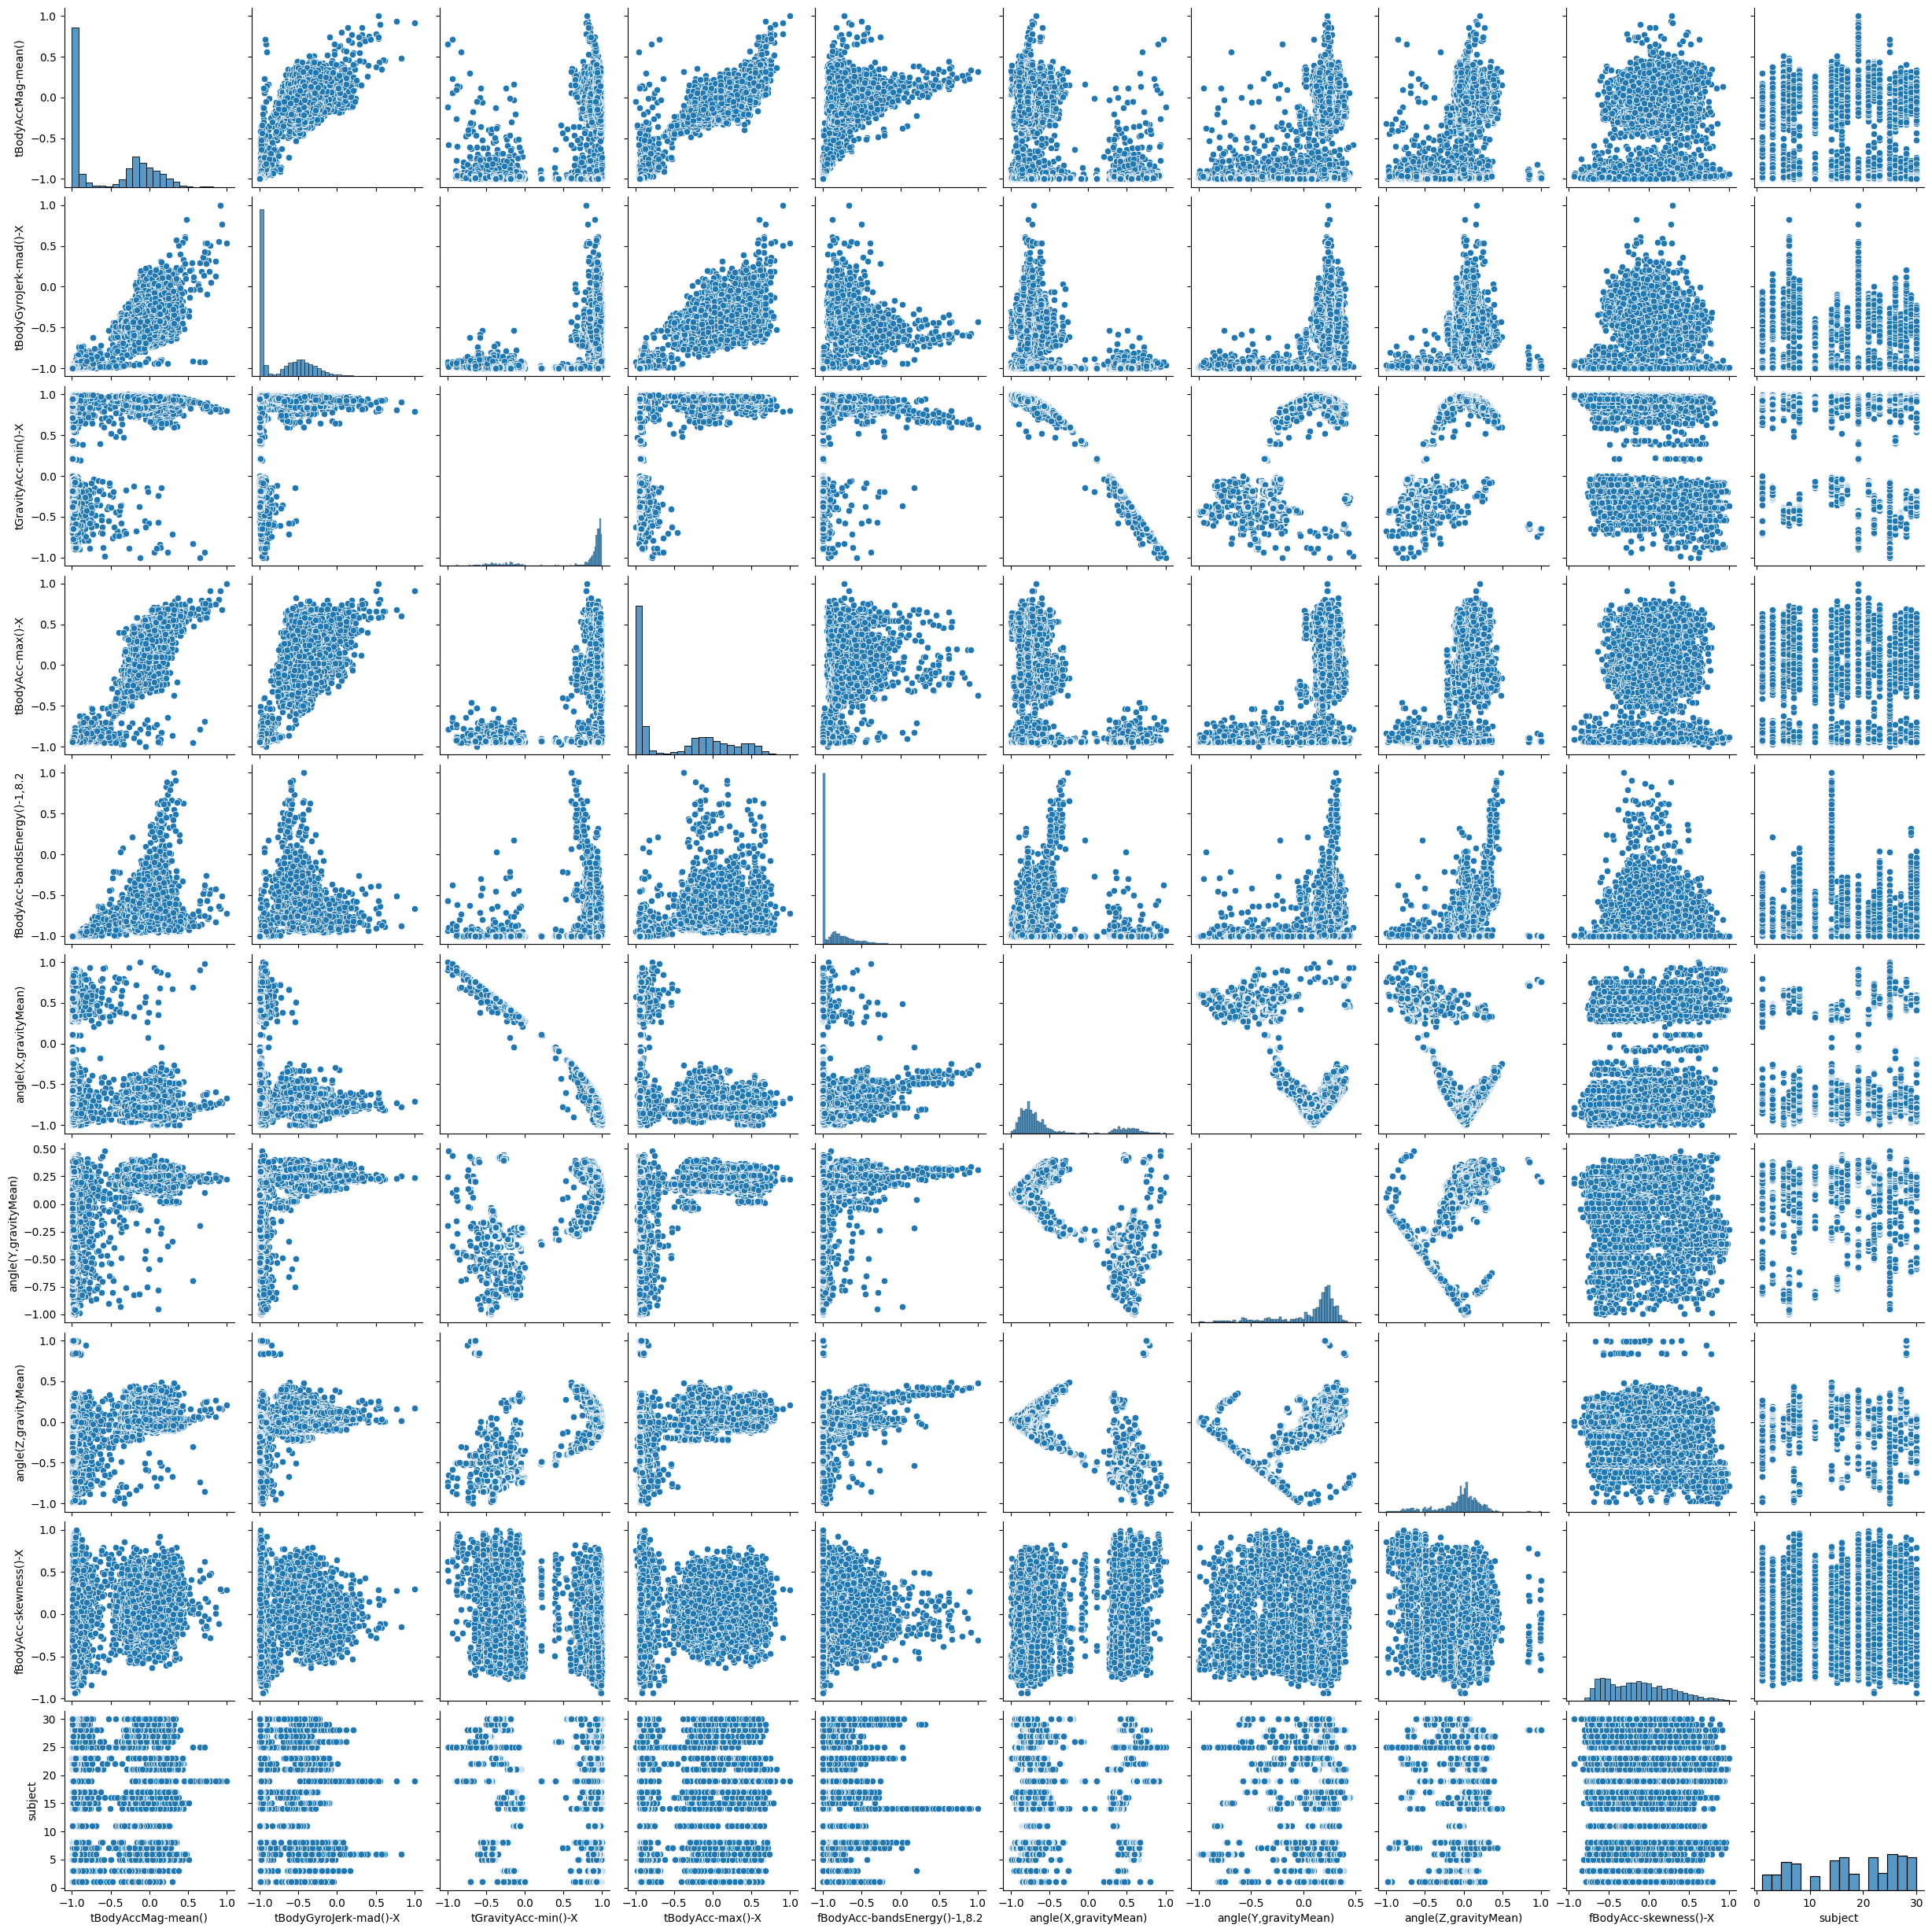

In [23]:
sns.pairplot(train)

Анализировать такое вообще с кайфом 😁

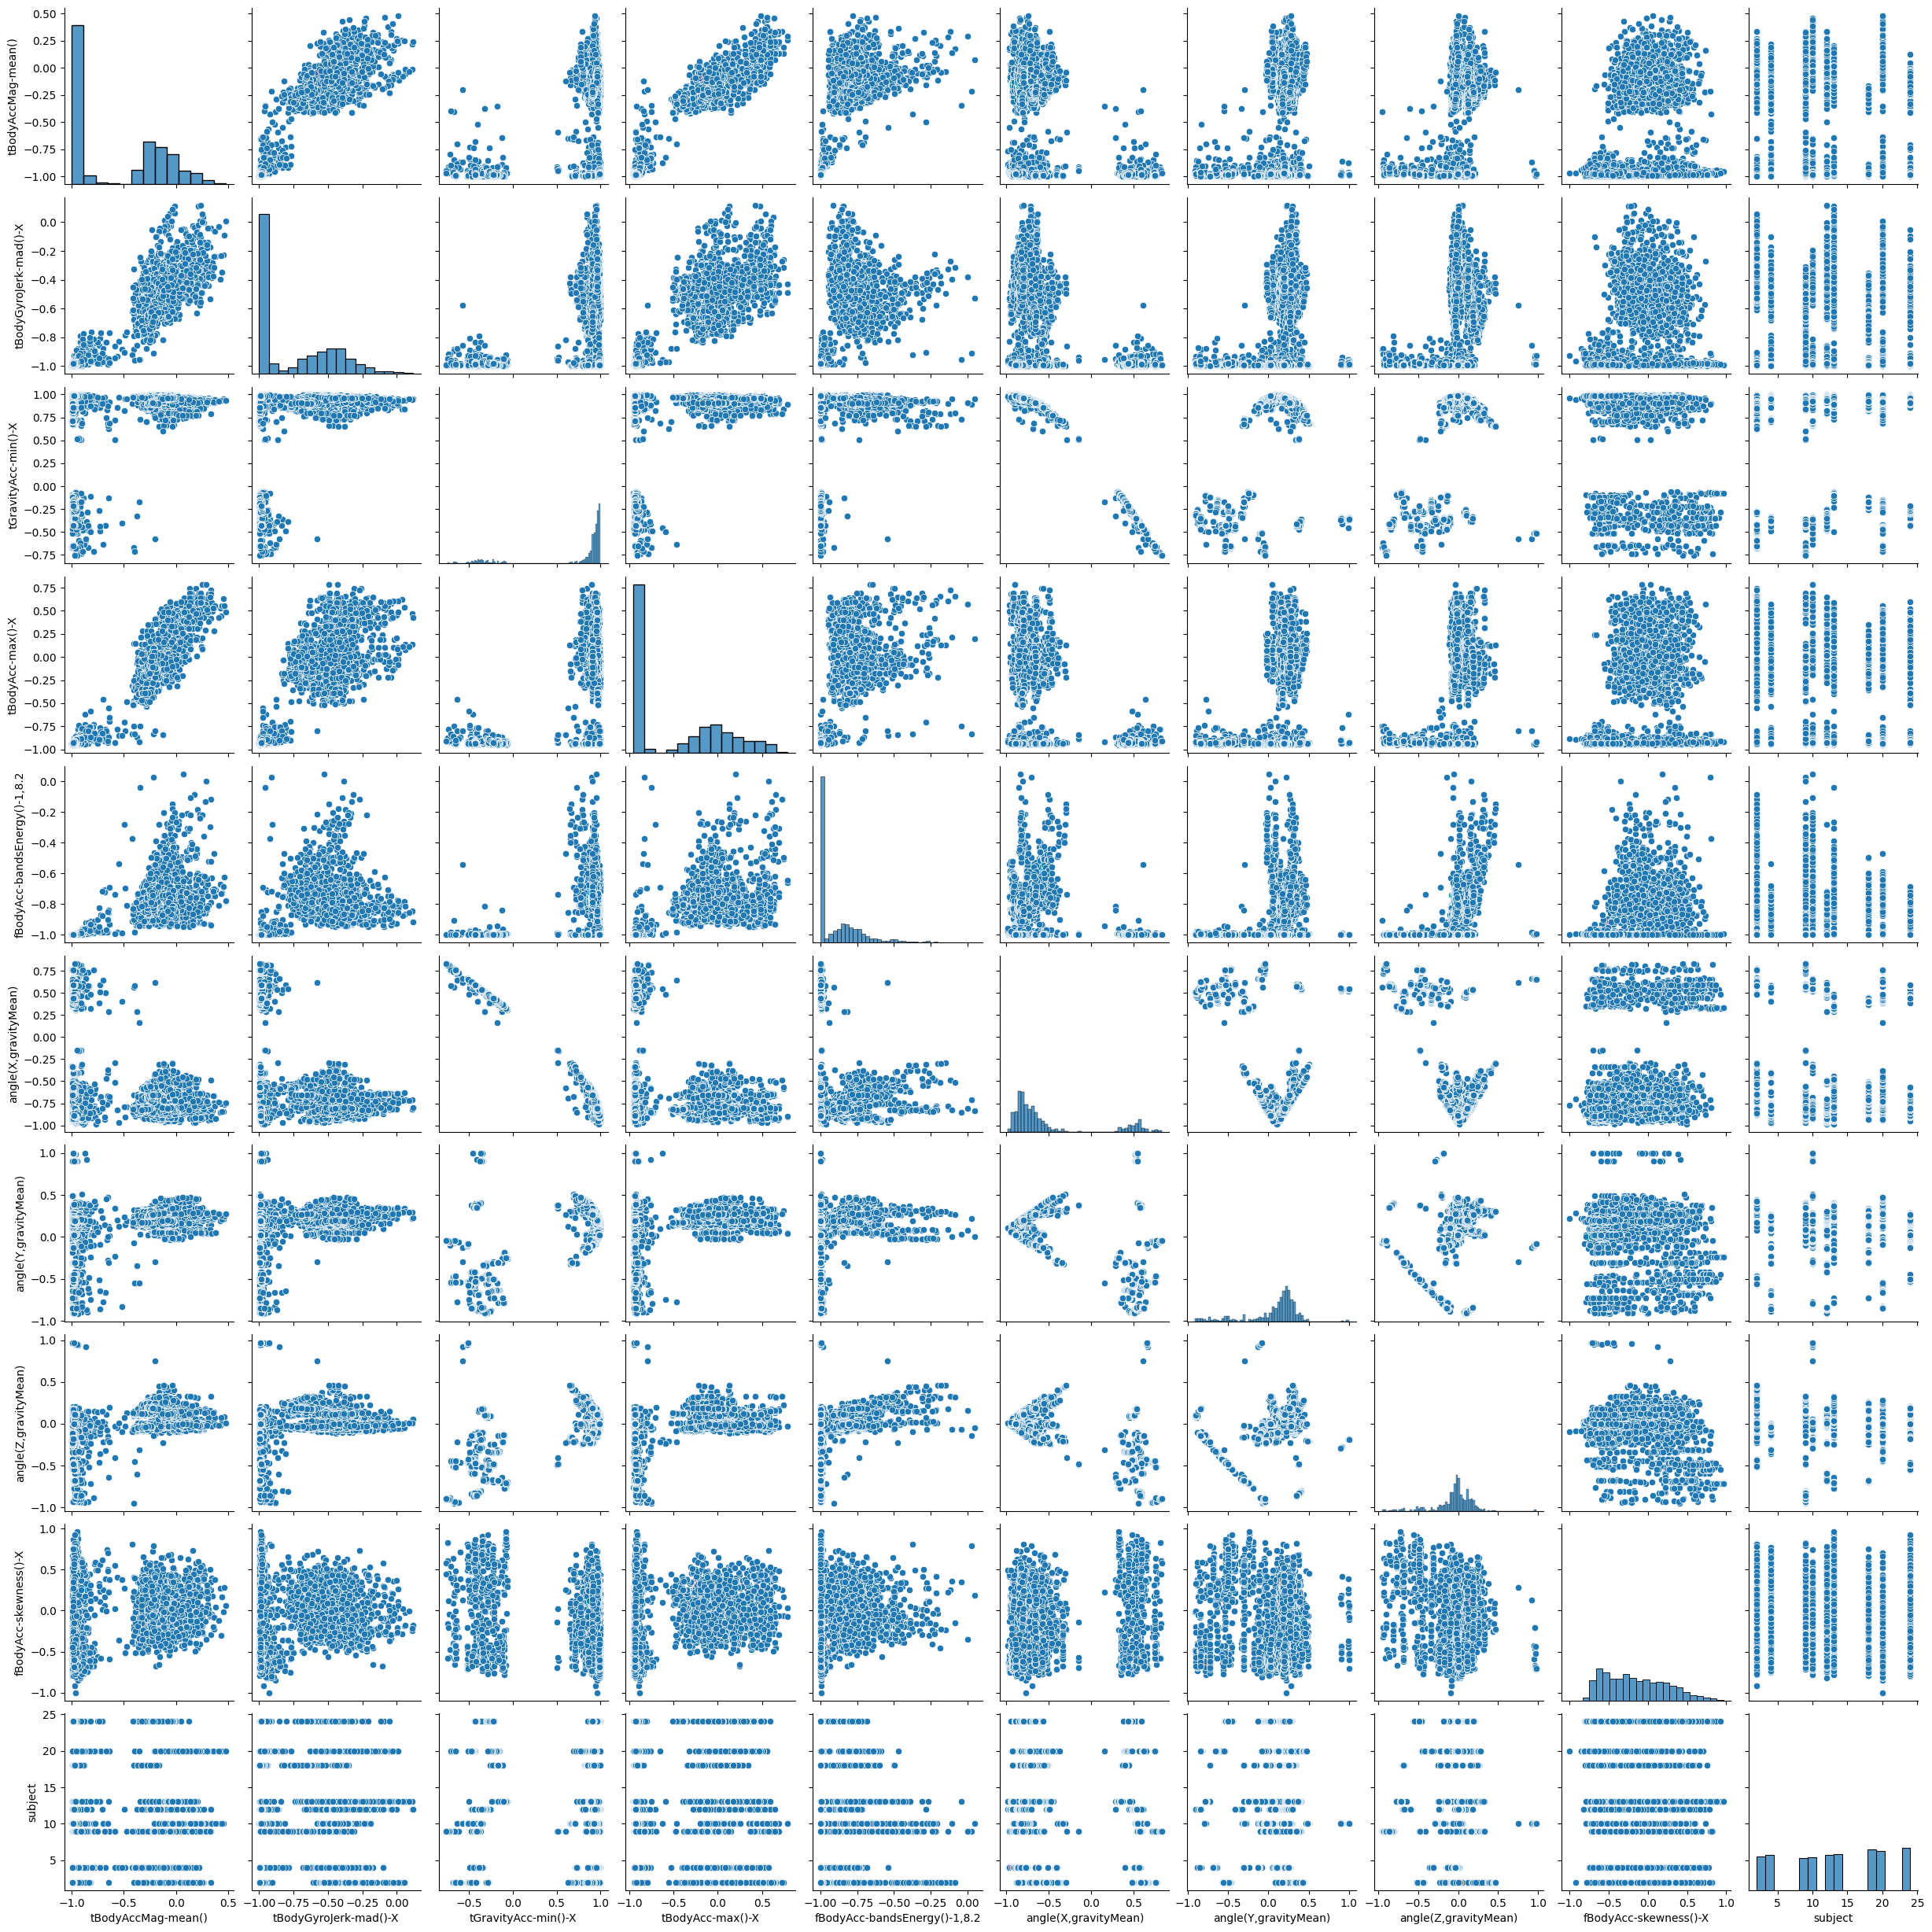

In [63]:
sns.pairplot(test)

### Задание 9 (1 балл)

Окей. Смотреть на все сразу не очень удобно. Кажется, нужно смотреть на признаки в отдельности и искать в них инсайты.

Попробуем проверить гипотезу. Отобразите плотность распределения (kde) `tBodyAccMag-mean()` для каждой из активностей, как в примере ниже. Видите закономерность? Можно ли поделить все активности на две группы? Если да, то проведите вертикальную линию, которая визуально неплохо разделяет эти группы.

Давайте первую группу называть статическими активностями, а вторую - динамическими.

Посчитайте, какую долю правильных ответов дает ваша вертикальная линия для разделения именно этих двух групп. С чем может быть связан полученный вами результат? Предположите логическое обоснование (почему именно данный признак так хорошо/плохо разделяет группы активностей).

Вам может пригодиться:
- sns.kdeplot

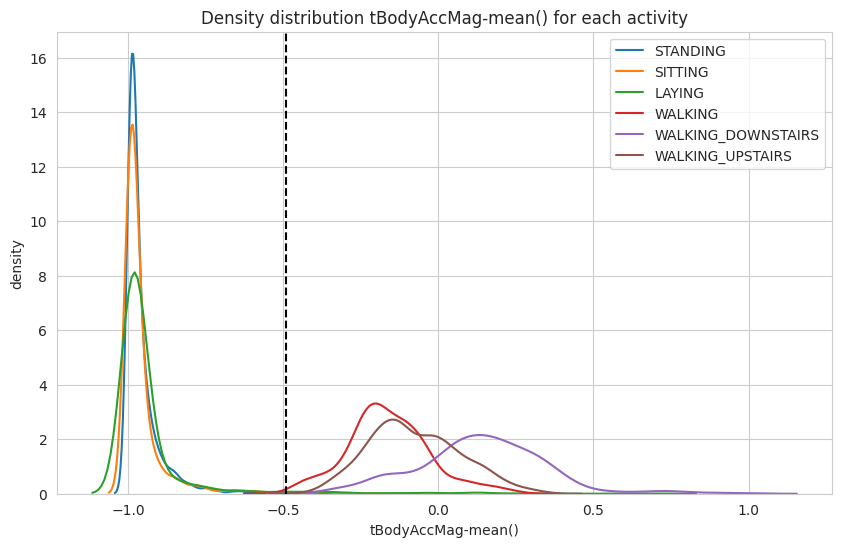

Доля правильных ответов при разделении на статические и динамические активности: 0.9925190424374319


In [33]:
# Создание графика с плотностью распределения для каждой активности
plt.figure(figsize=(10, 6))
for activity in train['Activity'].unique():
    sns.kdeplot(train[train['Activity'] == activity]['tBodyAccMag-mean()'], label=activity)

# Определение вертикальной линии для разделения активностей на две группы
vertical_line = -0.49  # Предполагаемое значение для разделения

# Построение вертикальной линии
plt.axvline(x=vertical_line, color='black', linestyle='--')

# Оформление графика
plt.title('Density distribution tBodyAccMag-mean() for each activity')
plt.xlabel('tBodyAccMag-mean()')
plt.ylabel('density')
plt.legend(loc='upper right')

# Отображение графика
plt.show()

# Разделение активностей на две группы
static_data = ['LAYING', 'SITTING', 'STANDING']
dynamic_data = ['WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']

# Подсчет доли правильных ответов
correct_predictions = ((train['tBodyAccMag-mean()'] <= vertical_line) & train['Activity'].isin(static_activities)) | ((train['tBodyAccMag-mean()'] > vertical_line) & train['Activity'].isin(dynamic_activities))
accuracy = correct_predictions.sum() / len(train)

# Вывод доли правильных ответов
print("Доля правильных ответов при разделении на статические и динамические активности:", accuracy)


Доля правильных ответов, равная 0.9925, говорит о том, что вертикальная линия, которую мы провели на графике плотности распределения признака tBodyAccMag-mean(), хорошо разделяет две группы активностей (статические и динамические).

Такой высокий уровень точности разделения может быть обусловлен тем, что признак tBodyAccMag-mean() отражает среднее значение магнитуды ускорения тела. Статические активности, такие как "LAYING", "SITTING", "STANDING", скорее всего, характеризуются низкой магнитудой ускорения, так как во время них тело находится в относительном покое. В то время как динамические активности, такие как "WALKING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS", характеризуются более высокой магнитудой ускорения, поскольку во время них происходит движение.

Таким образом, значение tBodyAccMag-mean() может быть хорошим индикатором для разделения статических и динамических активностей из-за различий в уровне ускорения, характерных для этих двух групп.

### Задание 10 (0.5 балла)

Поздравляем, вы проверили первую гипотезу в процессе EDA. Однако нам бы хотелось уметь не группы разделять, а каждый отдельный вид активности. Попробуйте нарисовать "ящики с усами" для `angle(X,gravityMean)` с разделением по разным видам активности на данных train. Можно ли сделать какой-то вывод по полученной визуализации? Проанализируйте и проинтерпретируйте полученные картинки (если заметили какую-то особенность, может какая-то категория значительно выделяется, то предположите, почему так могло произойти).

Вам может пригодиться:
- sns.boxplot

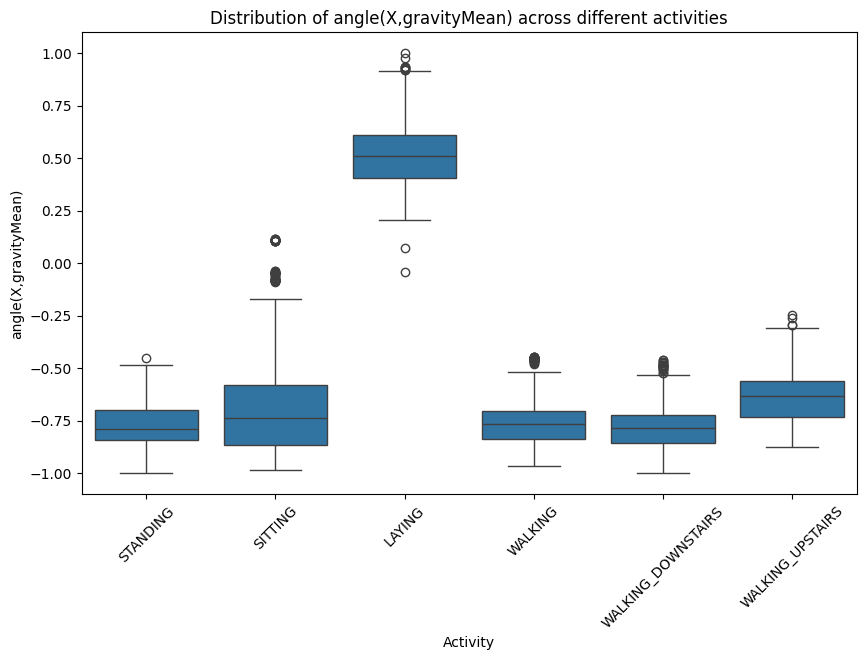

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=train)
plt.title('Distribution of angle(X,gravityMean) across different activities')
plt.xticks(rotation=45)
plt.show()

Анализируя полученные "ящики с усами", можно заметить, что для разных видов активности медианное значение и разброс значений признака angle(X,gravityMean) могут значительно отличаться. Например, для активности "SITTING" разброс значений шире по сравнению с активностями "WALKING" и "STANDING", что может говорить о том, что движения при сидении могут быть более разнообразными и менее стандартизированными. Кроме того, активность "LAYING" заметно выделяется на фоне остальных, это связано с тем, что положение тело в этом случае - горизонтально, в остальных - вертикально

### Задание 11 (0.5 балла)

Посмотрим теперь на `tBodyAcc-max()-X`. Визуализируйте скрипичные диаграммы для этого признака с разделением по активностям на всем train. Кажется логичным, что максимальное ускорение в моменте для разных активностей будет различаться. Однако есть ли активность, которая будет выделяться? Если да, то предложите объяснение, почему эта активность выделяется.

Вам может пригодиться:
- sns.violinplot

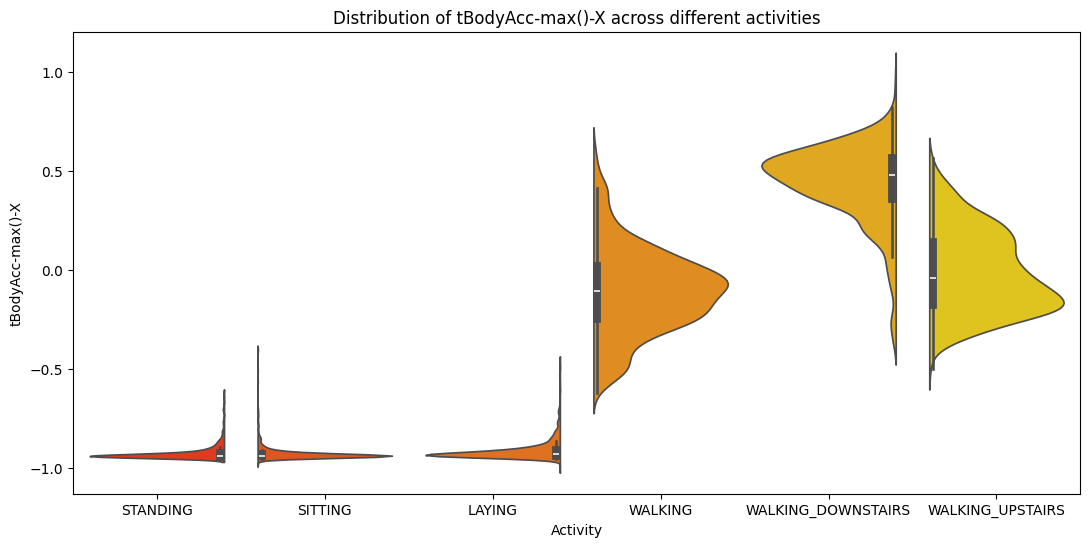

In [28]:
plt.figure(figsize=(13, 6))
sns.violinplot(x='Activity', y='tBodyAcc-max()-X', data=train, palette='autumn',split=True)
plt.title('Distribution of tBodyAcc-max()-X across different activities')
plt.show()

Анализируя полученные скрипичные диаграммы, можно заметить, что активность "WALKING_DOWNSTAIRS" выделяется среди остальных. Вероятно, это связано с тем, что при спуске по лестнице человек испытывает более сильное ускорение, чем при других активностях, поскольку тело подвергается дополнительным нагрузкам и изменениям скорости движения вниз

### Задание 12 (1 балл)

Вы уже можете с довольно хорошим качеством выделить две категории активности из шести. Продолжим.

Ранее уже упоминалось разделение на две группы активностей: статические и динамические. Пришла пора разделить датасет train на две части. Сделайте это! Теперь на одной картинке покажите распределения `fBodyAcc-bandsEnergy()-1,8.2` для динамичных активностей (boxenplot - немного измененый "ящик с усами") и `angle(Y,gravityMean)` для статических - тут хватит и простой гистограммы (прямо, как в примере ниже). Можно ли выделить еще какие-то активности? Если да, напишите, какие активности на 1 и 2 графиках выделяются.

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec (заметили, что один график больше другого? попробуйте сами так сделать - вам понравится...)
- sns.boxenplot
- sns.histplot

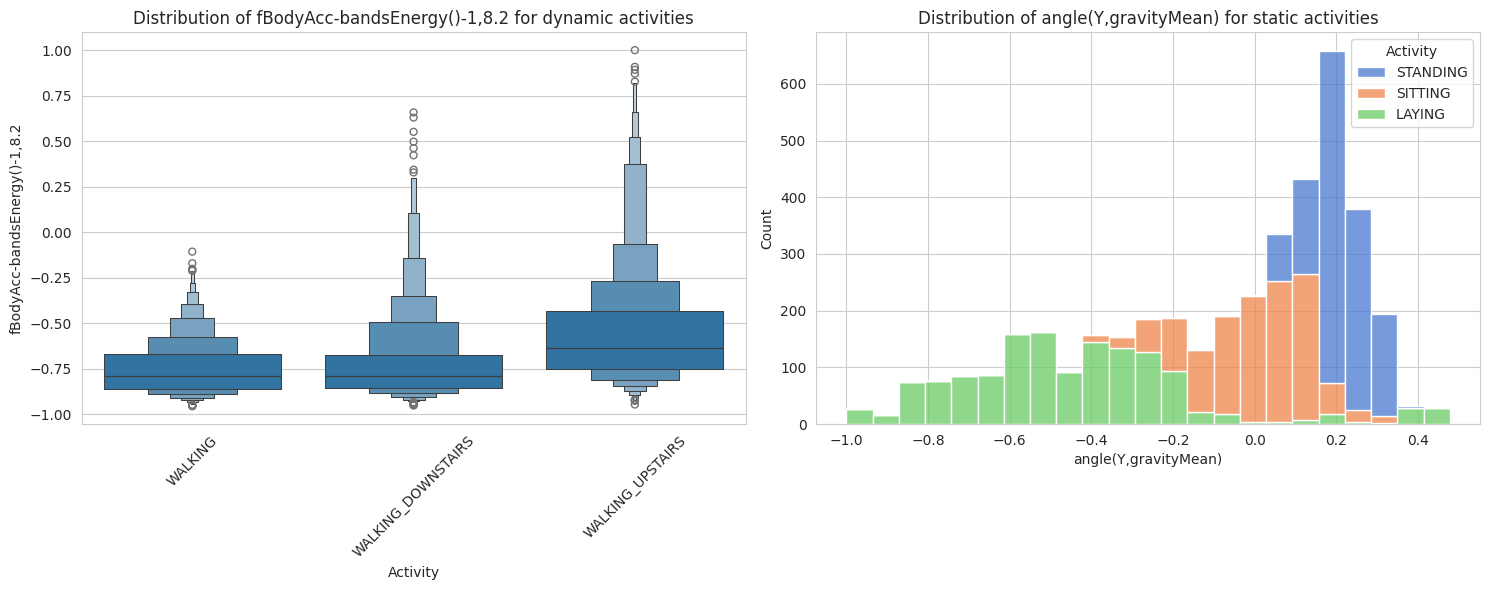

In [39]:
# Разделение данных на динамические и статические активности
dynamic_activities = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS']
static_activities = ['LAYING', 'SITTING', 'STANDING']

dynamic_data = train[train['Activity'].isin(dynamic_activities)]
static_data = train[train['Activity'].isin(static_activities)]

# Устанавливаем стиль графиков
sns.set_style("whitegrid")

# Создание сетки для графиков
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# График для динамических активностей
sns.boxenplot(x='Activity', y='fBodyAcc-bandsEnergy()-1,8.2', data = dynamic_data, ax=axes[0])
axes[0].set_title('Distribution of fBodyAcc-bandsEnergy()-1,8.2 for dynamic activities')
axes[0].tick_params(axis='x', rotation=45)

# График для статических активностей
sns.histplot(x='angle(Y,gravityMean)', hue='Activity', data=static_data, ax=axes[1], multiple="stack", palette='muted')
axes[1].set_title('Distribution of angle(Y,gravityMean) for static activities')

plt.tight_layout()
plt.show()



На первом графике (динамические активности) можно выделить активность "WALKING_UPSTAIRS", которая имеет более высокие значения fBodyAcc-bandsEnergy()-1,8.2 по сравнению с другими динамическими активностями.
На втором графике (статические активности) можно выделить активность "STANDING", которая имеет более высокую частоту значений angle(Y,gravityMean) около среднего значения

### Задание 13 (0.5 балла)

Не всегда жизнь будет такой легкой, а данные будут полностью или почти линейно разделимы в одному признаку (иначе чем бы занимались дата саентисты...). Часто данные вообще ни по одному признаку нельзя адекватно разделить (да и по комбинациям признаков тоже). Давайте попробуем взять не один признак, а целых два!

Рассмотрим только статические активности. Будет снова два графика сразу. На первом графике будет боксплот распределения `fBodyAcc-skewness()-X` по активностям. А на втором попробуем взять не все наблюдения данной группы активностей, а только их часть. Разделимы ли категории по `fBodyAcc-skewness()-X`? А если взять только те строки, где `fBodyAcc-skewness()-X < -0.376`, и теперь вывести боксплот распределения `angle(Y,gravityMean)` по разным активностям? Попробуйте и напишите, выделилась ли какая-то категория?

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec
- sns.boxplot

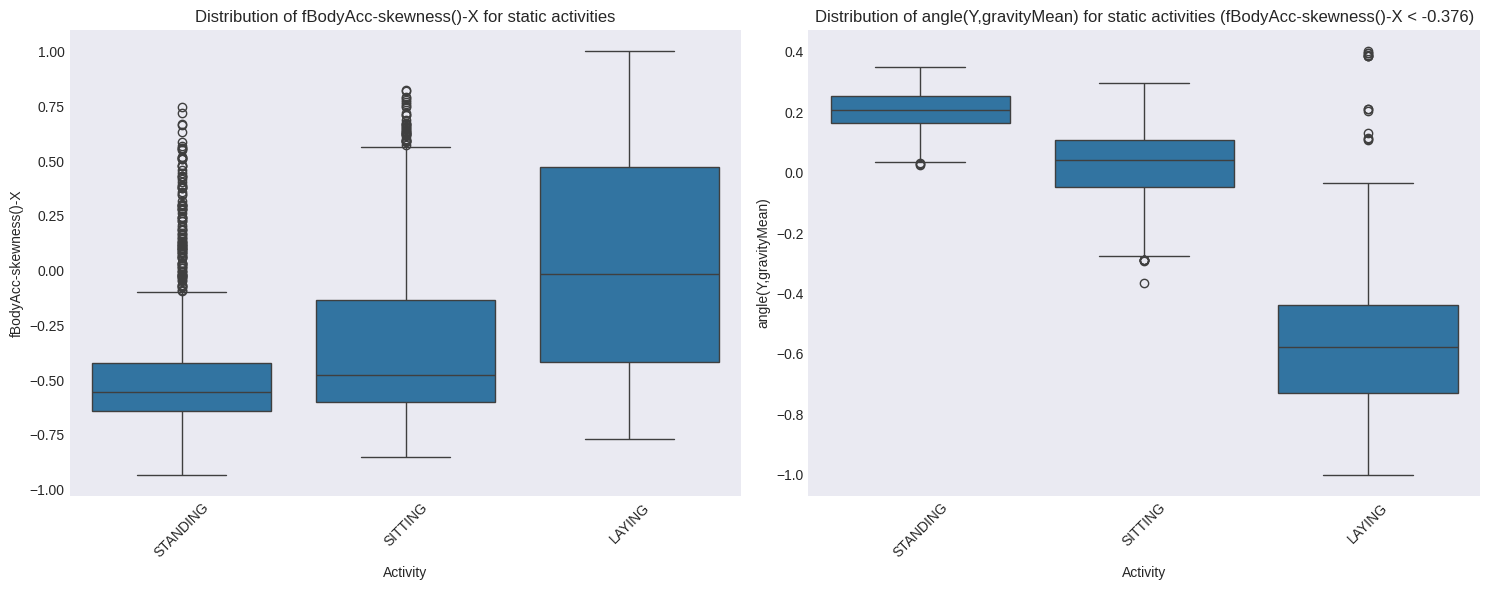

In [40]:
plt.style.use('seaborn-dark')

# Создаем сетку для графиков
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Боксплот распределения fBodyAcc-skewness()-X по статическим активностям
sns.boxplot(x='Activity', y='fBodyAcc-skewness()-X', data=static_data, ax=axes[0])
axes[0].set_title('Distribution of fBodyAcc-skewness()-X for static activities')
axes[0].tick_params(axis='x', rotation=45)

# Выбираем только часть наблюдений, где fBodyAcc-skewness()-X < -0.376
filtered_static_data = static_data[static_data['fBodyAcc-skewness()-X'] < -0.376]

# Боксплот распределения angle(Y,gravityMean) по статическим активностям с отфильтрованными данными
sns.boxplot(x='Activity', y='angle(Y,gravityMean)', data=filtered_static_data, ax=axes[1])
axes[1].set_title('Distribution of angle(Y,gravityMean) for static activities (fBodyAcc-skewness()-X < -0.376)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



Явно выделяется активность "LAYING", поскольку при отрицательном значении асимметрии ускорения (fBodyAcc-skewness()-X < -0.376) угол между осью Y и гравитационным ускорением (angle(Y,gravityMean)) принимает наименьшее значение, что соответствует положению "лежа".

Поздравляем, теперь вы на шажок ближе к тому, чтобы стать решающим деревом!

### Задание 14 (1 балл)

Вот и осталась лишь одна активность, которую мы никак не выделили. Попробуем и ее какими-то порогами отделить от всех остальных. Да, можно было бы сказать, что, раз уж мы выделили 5 из 6 категорий, то все остальное - это и есть последняя категория, но мы не идем легкими путями. Выделить оставшуюсь категорию с хорошим качеством не так уж и просто. Из доступных признаков, сначала посмотрите на распределение `tBodyAcc-max()-X` на динамических активностях (скрипичная диаграмма отлично подойдет).

А теперь спускаем вам порог `tBodyAcc-max()-X < 0.157`. Для таких строк постройте диаграмму рассеяния для признака `tGravityAcc-min()-X`. Да, получается неидеально, но это честная работа. Можно выбрать порог так, чтобы чисто из таблицы с динамическими активностями из строк, где `tBodyAcc-max()-X < 0.157`, выбрать по некоторому порогу для `tGravityAcc-min()-X` строки так, чтобы доля правильных ответов на оставшейся категории была не меньше 83%!

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec
- sns.violinplot
- sns.swarmplot (иногда лучше подходит, чем просто sns.scatterplot)

Обратите внимание, что подписи к осям можно убирать методами plt. Например, если у вас общее название для оси Y для обоих графиков, то можно не подписывать ось Y у второго графика.

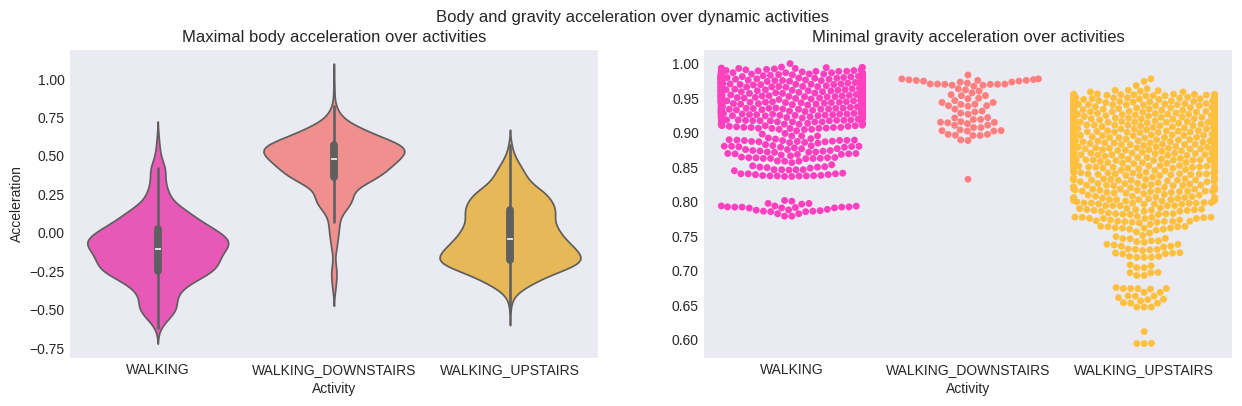

In [41]:
# Создание "таблицы" с двумя графиками
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
plt.suptitle('Body and gravity acceleration over dynamic activities')

# Первый график - скрипичная диаграмма для tBodyAcc-max()-X
sns.violinplot(data=train[train["Activity"].isin(dynamic_activities)], x='Activity', y='tBodyAcc-max()-X', palette='spring', ax=axes[0])
axes[0].set_title('Maximal body acceleration over activities')
axes[0].set_ylabel("Acceleration")

# Второй график - диаграмма рассеяния для tGravityAcc-min()-X с фильтрацией по условию
sns.swarmplot(data=train.loc[(train["Activity"].isin(dynamic_activities)) & (train["tBodyAcc-max()-X"] < 0.157)], x='Activity', y='tGravityAcc-min()-X', palette='spring', ax=axes[1])
axes[1].set_title('Minimal gravity acceleration over activities')
axes[1].set_ylabel("")

plt.show()


На втором графике можно заметить, что при значениях ускорения менее 0.77 для признака tBodyAcc-max()-X, характерно наличие подъема по лестнице

### Задание 15 (0.5 балла)

Теперь попробуем более интерактивные графики. Установите библиотеку `plotly` (обычно `pip install plotly` или `conda install plotly`). Синтаксис очень похож на `seaborn`, но вот [документация для plotly.express](https://plotly.com/python-api-reference/plotly.express.html).

Сначала подготовим данные для визуализации. Будем считать t-SNE просто "черным ящиком", который принимает наши данные и проецирует их в двумерное или трехмерное пространство. Возможно, придется немного подождать.

In [42]:
%%time
from sklearn.manifold import TSNE
tsne = TSNE(random_state=666, n_components=2)
new = tsne.fit_transform(train.drop(['subject', 'Activity'], axis=1))
df_2_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y']),
    train['Activity']
], axis=1)

tsne = TSNE(random_state=666, n_components=3)
new = tsne.fit_transform(train.drop(['subject', 'Activity'], axis=1))
df_3_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y', 'z']),
    train['Activity']
], axis=1)

CPU times: user 6min 42s, sys: 830 ms, total: 6min 43s
Wall time: 4min 15s


Теперь нарисуйте scatter-график через `plotly.express` для `df_2_comp` с выделением цветами активностей. Красиво получилось? Видны скопления точек одного цвета? Можно разные активности отделить линиями на данном графике?

In [43]:
import plotly.express as px

fig = px.scatter(df_2_comp, x='x', y='y', color='Activity', title='t-SNE 2D Visualization')
fig.show()

в целом - красиво, скопления точек имеются, но одназначно можно отделить только "LAYING", отсальные точки скопления так или иначе являются смещанными

Мы не отстаем от трендов и тоже можем в 3D. Сейчас и вы научитесь (если еще не умеете). Нарисуйте scatter_3d-график через `plotly.express` для `df_3_comp` с выделением цветами активностей. Повращайте его. Нормально получилось? Есть ли какая-то структура у точек?

In [44]:
fig = px.scatter_3d(df_3_comp, x='x', y='y', z='z', color='Activity', title='t-SNE 3D Visualization')
fig.show()

Да, в целом также как и в 2D - может однозначно отделить точки категории "LAYING" - остальные скопления также остались смешанными

### Задание 16 (1 балл)

Мы сделали вам fit. Ваша очередь сделать predict. Допишите функцию, которая принимает на вход датафрейм с признаками, а выдает вектор из предсказаний - для каждой строки датафрейма вы определяете, к какому классу принадлежит объект. Рекомендуем сразу записывать из строками, а не кодировать в числа. Дальше фукнция `accuracy_score` выдаст вам долю правильных ответов.

Подсказка: вы уже отделили категории друг от друга по каким-то признакам. Воспользуйтесь этим знанием! Используя только проведенный вами анализ можно спокойно выбить не менее 75% на train и test! Если вы получите меньше 75%, то балл будет снижен. Авторское решение (на основе всех графиков выше) выбивает 81% и 77% на train и test соответственно. [Шапргалка с готовыми идеями для такой задачи](https://www.youtube.com/watch?v=dQw4w9WgXcQ)

In [56]:
def combined_function(df):
    if df["tBodyAccMag-mean()"] > -0.49:
        if (df["tGravityAcc-min()-X"] < 0.9) or (df["fBodyAcc-bandsEnergy()-1,8.2"] > -0.34):
            return "WALKING_UPSTAIRS"
        if df["tBodyAcc-max()-X"] > 0.18:
            return "WALKING_DOWNSTAIRS"
        return "WALKING"
    else:
        if df["angle(X,gravityMean)"] > 0.13:
            return "LAYING"
        elif df["angle(Y,gravityMean)"] > 0.14:
            return "STANDING"
        elif df["fBodyAcc-skewness()-X"] < 0.61:
            return "SITTING"
        elif df["fBodyAcc-skewness()-X"] > -0.45:
            return "SITTING"
        else:
            return "STANDING"

def predict(df: pd.DataFrame):
  return df.apply(combined_function, axis=1)

def accuracy_score(y_true, y_pred) -> float:
    y_true = np.asarray(y_true).reshape(-1, 1)
    y_pred = np.asarray(y_pred).reshape(-1, 1)
    return (y_true == y_pred).mean()

train_preds = predict(train)
test_preds = predict(test)
print(f"Accuracy on train set => {accuracy_score(train['Activity'], train_preds)}")
print(f"Accuracy on test set => {accuracy_score(test['Activity'], test_preds)}")


Accuracy on train set => 0.8322905331882481
Accuracy on test set => 0.7763827621309807


__Место для мема и/или фидбэка__